In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 16.9 MB/s eta 0:00:00


In [30]:
# Import necessary libraries
import os
import torch
from ultralytics import YOLO

# Configuration class
class Config:
    IMG_SIZE = 640
    BATCH_SIZE = 16
    EPOCHS = 10
    LEARNING_RATE = 3e-4
    NUM_CLASSES = 15  # Adjusted to match dataset
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

    CLASSES = ['asparagus', 'avocados', 'broccoli', 'cabbage',
               'celery', 'cucumber', 'green_apples',
               'green_beans', 'green_capsicum', 'green_grapes', 'kiwifruit',
               'lettuce', 'limes', 'peas', 'spinach']

    # Paths to new structured dataset
    TRAIN_IMAGES_PATH = '/content/drive/MyDrive/green_calorie/structured_dataset/images/train'
    VAL_IMAGES_PATH = '/content/drive/MyDrive/green_calorie/structured_dataset/images/val'

    # Path to test image
    TEST_IMAGE_PATH = '/content/drive/MyDrive/green_calorie/test_broc.jpg'

# Write the `data.yaml` for YOLOv8
yaml_path = "/content/data.yaml"
yaml_content = f"""
train: {Config.TRAIN_IMAGES_PATH}
val: {Config.VAL_IMAGES_PATH}
nc: {Config.NUM_CLASSES}
names: {Config.CLASSES}
"""
with open(yaml_path, "w") as f:
    f.write(yaml_content)



In [4]:
# Fine-tune YOLOv8 pretrained model
model = YOLO('yolov8n.pt')  # Load a pretrained YOLOv8 model (nano version)

# Train the model with your dataset
model.train(
    data=yaml_path,  # Path to the YAML file created above
    epochs=Config.EPOCHS,
    imgsz=Config.IMG_SIZE,
    batch=Config.BATCH_SIZE,
    lr0=Config.LEARNING_RATE,
    device=Config.DEVICE
)

# Save the fine-tuned model
model.export(format="torchscript")  # Save the trained model in TorchScript format for deployment


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.8MB/s]


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 56.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/green_calorie/structured_dataset/labels/train... 478 images, 0 backgrounds, 0 corrupt: 100%|██████████| 478/478 [00:32<00:00, 14.75it/s]


train: New cache created: /content/drive/MyDrive/green_calorie/structured_dataset/labels/train.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 963. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/green_calorie/structured_dataset/labels/val... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:08<00:00, 14.73it/s]


val: New cache created: /content/drive/MyDrive/green_calorie/structured_dataset/labels/val.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 246. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(

       1/10      2.33G      1.439      4.434      1.862         23        640: 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        120        246     0.0474      0.179     0.0436     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.34G      1.251      3.905      1.698         31        640: 100%|██████████| 30/30 [00:02<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]

                   all        120        246     0.0134      0.836      0.112     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.27G      1.253      3.499      1.686         28        640: 100%|██████████| 30/30 [00:02<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]

                   all        120        246      0.505      0.131       0.17      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.27G      1.248      3.249       1.68         27        640: 100%|██████████| 30/30 [00:03<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all        120        246       0.37      0.304      0.262      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.27G       1.18      3.031      1.618         21        640: 100%|██████████| 30/30 [00:02<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all        120        246      0.273      0.353      0.246      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.27G      1.177      2.828      1.582         23        640: 100%|██████████| 30/30 [00:02<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]

                   all        120        246      0.427      0.462      0.442      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.27G      1.148      2.635      1.551         47        640: 100%|██████████| 30/30 [00:02<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        120        246      0.503      0.443      0.503      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.27G      1.099      2.482      1.469         29        640: 100%|██████████| 30/30 [00:02<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        120        246      0.565      0.523      0.571        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.27G      1.072      2.377      1.459         29        640: 100%|██████████| 30/30 [00:02<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all        120        246      0.498      0.524       0.56      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.27G       1.06      2.294      1.451         23        640: 100%|██████████| 30/30 [00:02<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.57it/s]

                   all        120        246      0.645       0.48      0.608      0.424



10 epochs completed in 0.014 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]


                   all        120        246      0.643       0.48      0.609      0.426
             asparagus         10         17      0.759      0.353      0.624      0.459
              avocados         12         36      0.773      0.778      0.843      0.586
              broccoli          4         14      0.662      0.357      0.597      0.335
               cabbage          4          7      0.563      0.555      0.574      0.407
                celery          8         17      0.289     0.0588      0.185     0.0851
              cucumber         20         60      0.585      0.133      0.327      0.179
          green_apples          4          6      0.321      0.833      0.724       0.61
           green_beans          4          4      0.389       0.25      0.301      0.178
        green_capsicum          8         16      0.783        0.5      0.662      0.499
          green_grapes          6         10      0.586        0.3      0.483      0.372
             kiwifrui

'runs/detect/train/weights/best.torchscript'


image 1/1 /content/drive/MyDrive/green_calorie/test_broc.jpg: 448x640 6 broccolis, 9.0ms
Speed: 2.3ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


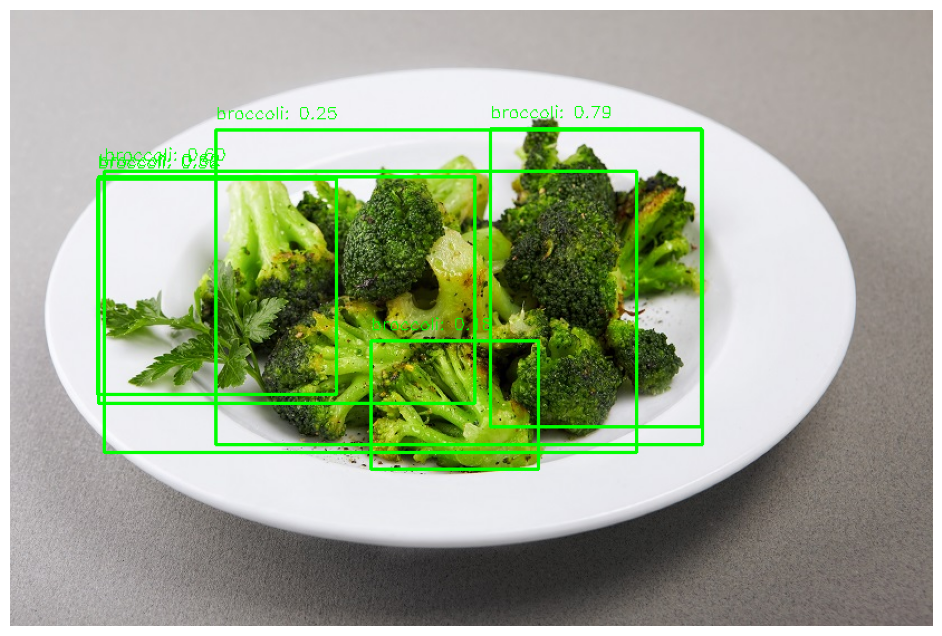


Detailed Detections:
Detection 1:
  Class: broccoli
  Top Confidence: 0.79
  Bounding Box: (430.90863, 106.55771, 619.4027, 373.06085)
  Top 3 Confidence Scores: 0.79, 0.62, 0.60
------------------------------
Detection 2:
  Class: broccoli
  Top Confidence: 0.62
  Bounding Box: (79.26857, 149.70564, 416.89304, 352.8383)
  Top 3 Confidence Scores: 0.79, 0.62, 0.60
------------------------------
Detection 3:
  Class: broccoli
  Top Confidence: 0.60
  Bounding Box: (84.01328, 144.79097, 561.903, 396.47534)
  Top 3 Confidence Scores: 0.79, 0.62, 0.60
------------------------------
Detection 4:
  Class: broccoli
  Top Confidence: 0.36
  Bounding Box: (78.0924, 151.70544, 292.63657, 344.18387)
  Top 3 Confidence Scores: 0.79, 0.62, 0.60
------------------------------
Detection 5:
  Class: broccoli
  Top Confidence: 0.25
  Bounding Box: (184.3331, 107.51018, 620.5084, 389.2146)
  Top 3 Confidence Scores: 0.79, 0.62, 0.60
------------------------------
Detection 6:
  Class: broccoli
  Top Co

In [87]:
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform inference on the test image
results = model.predict(
    source=Config.TEST_IMAGE_PATH,
    imgsz=Config.IMG_SIZE,
    conf=0.17  # Confidence threshold
)

# Load the image for visualization
image = cv2.imread(Config.TEST_IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# To store detailed information about detections
detection_details = []

# Iterate over detections
for result in results[0].boxes.data:
    # Extract bounding box coordinates, confidence score, and class ID
    x1, y1, x2, y2, confidence, class_id = result.cpu().numpy()

    # Draw the bounding box with top confidence score
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
    label = f"{Config.CLASSES[int(class_id)]}: {confidence:.2f}"
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1)

    # Save details for printing below
    detection_details.append({
        "class": Config.CLASSES[int(class_id)],
        "top_confidence": confidence,
        "bbox": (x1, y1, x2, y2)
    })

# Display the image with bounding boxes and labels
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Print detailed top 3 confidence scores for each bounding box
print("\nDetailed Detections:")
for idx, det in enumerate(detection_details, start=1):
    print(f"Detection {idx}:")
    print(f"  Class: {det['class']}")
    print(f"  Top Confidence: {det['top_confidence']:.2f}")
    print(f"  Bounding Box: {det['bbox']}")
    # Retrieve the top 3 scores for detailed output
    confidence_scores = results[0].boxes.conf.cpu().numpy()
    top_3_scores = sorted(confidence_scores, reverse=True)[:3]
    print(f"  Top 3 Confidence Scores: {', '.join([f'{score:.2f}' for score in top_3_scores])}")
    print("-" * 30)


In [106]:
import cv2
import matplotlib.pyplot as plt

def test_image(model, image_path, classes, conf_threshold=0.1744):
    """
    Perform inference on an image, draw bounding boxes, and print detection details.

    Args:
        model: Loaded YOLO model.
        image_path: Path to the test image.
        classes: List of class names.
        conf_threshold: Confidence threshold for filtering detections.
    """
    # Perform inference on the image
    results = model.predict(
        source=image_path,
        imgsz=Config.IMG_SIZE,
        conf=conf_threshold
    )

    # Load the image for visualization
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # To store detailed information about detections
    detection_details = []

    # Iterate over detections
    for result in results[0].boxes.data:
        # Extract bounding box coordinates, confidence score, and class ID
        x1, y1, x2, y2, confidence, class_id = result.cpu().numpy()

        # Draw the bounding box with top confidence score
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
        label = f"{classes[int(class_id)]}: {confidence:.2f}"
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1)

        # Save details for printing below
        detection_details.append({
            "class": classes[int(class_id)],
            "top_confidence": confidence,
            "bbox": (x1, y1, x2, y2)
        })

    # Display the image with bounding boxes and labels
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Print detailed detections
    print("\nDetailed Detections:")
    for idx, det in enumerate(detection_details, start=1):
        print(f"Detection {idx}:")
        print(f"  Class: {det['class']}")
        print(f"  Top Confidence: {det['top_confidence']:.2f}")
        print(f"  Bounding Box: {det['bbox']}")
        print("-" * 30)





image 1/1 /content/drive/MyDrive/green_calorie/test_broc.jpg: 448x640 6 broccolis, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


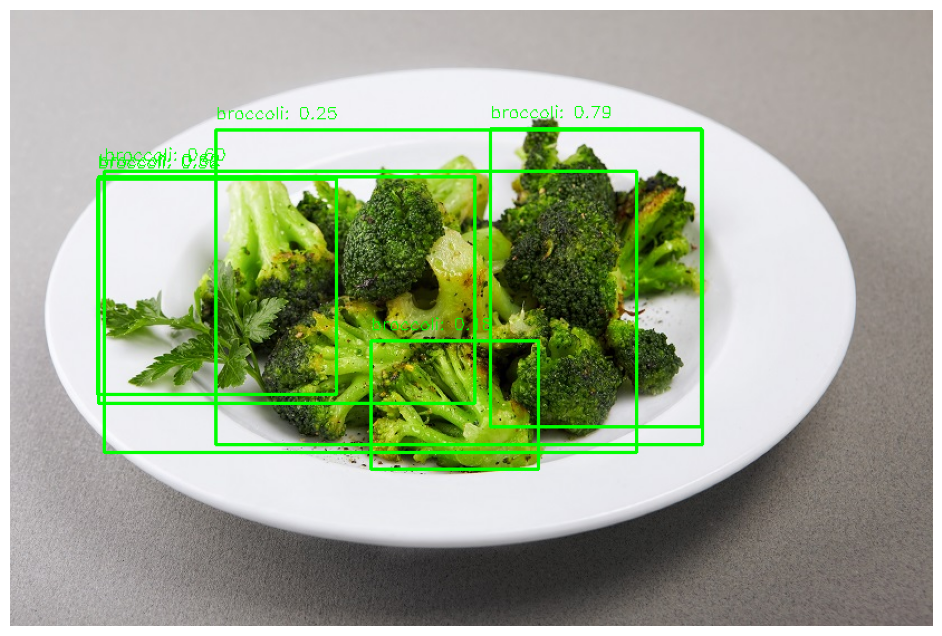


Detailed Detections:
Detection 1:
  Class: broccoli
  Top Confidence: 0.79
  Bounding Box: (430.90863, 106.55771, 619.4027, 373.06085)
------------------------------
Detection 2:
  Class: broccoli
  Top Confidence: 0.62
  Bounding Box: (79.26857, 149.70564, 416.89304, 352.8383)
------------------------------
Detection 3:
  Class: broccoli
  Top Confidence: 0.60
  Bounding Box: (84.01328, 144.79097, 561.903, 396.47534)
------------------------------
Detection 4:
  Class: broccoli
  Top Confidence: 0.36
  Bounding Box: (78.0924, 151.70544, 292.63657, 344.18387)
------------------------------
Detection 5:
  Class: broccoli
  Top Confidence: 0.25
  Bounding Box: (184.3331, 107.51018, 620.5084, 389.2146)
------------------------------
Detection 6:
  Class: broccoli
  Top Confidence: 0.18
  Bounding Box: (323.05795, 296.8206, 473.81546, 411.58908)
------------------------------


In [107]:
# Test first image
test_image(model, Config.TEST_IMAGE_PATH, Config.CLASSES)




image 1/1 /content/drive/MyDrive/green_calorie/test2.JPG: 416x640 1 broccoli, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


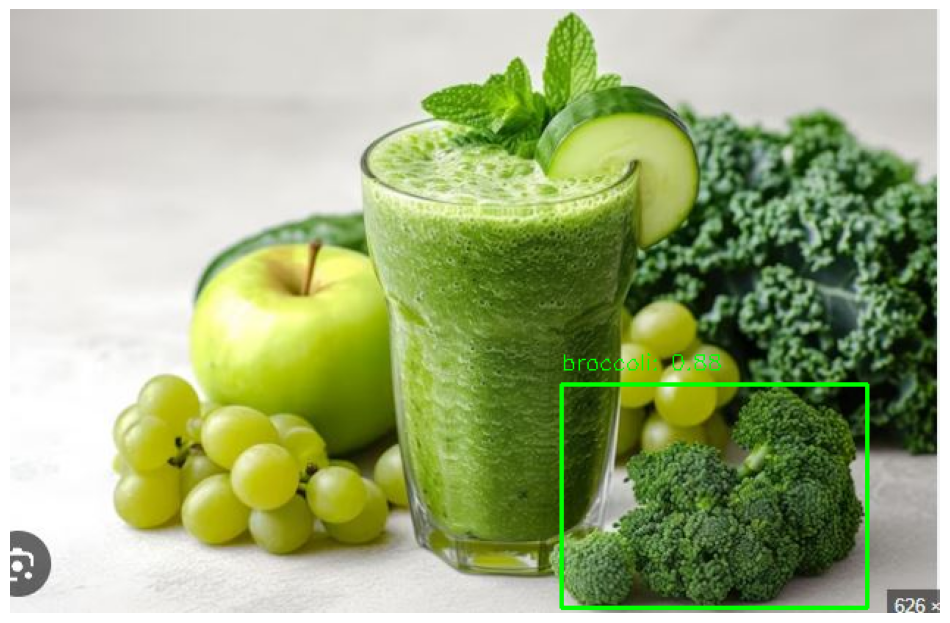


Detailed Detections:
Detection 1:
  Class: broccoli
  Top Confidence: 0.88
  Bounding Box: (375.1793, 255.77081, 583.6711, 407.0587)
------------------------------


In [108]:
# Test second image
test_image(model, '/content/drive/MyDrive/green_calorie/test2.JPG', Config.CLASSES)


image 1/1 /content/drive/MyDrive/green_calorie/test3.jpg: 448x640 1 avocados, 1 green_apples, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


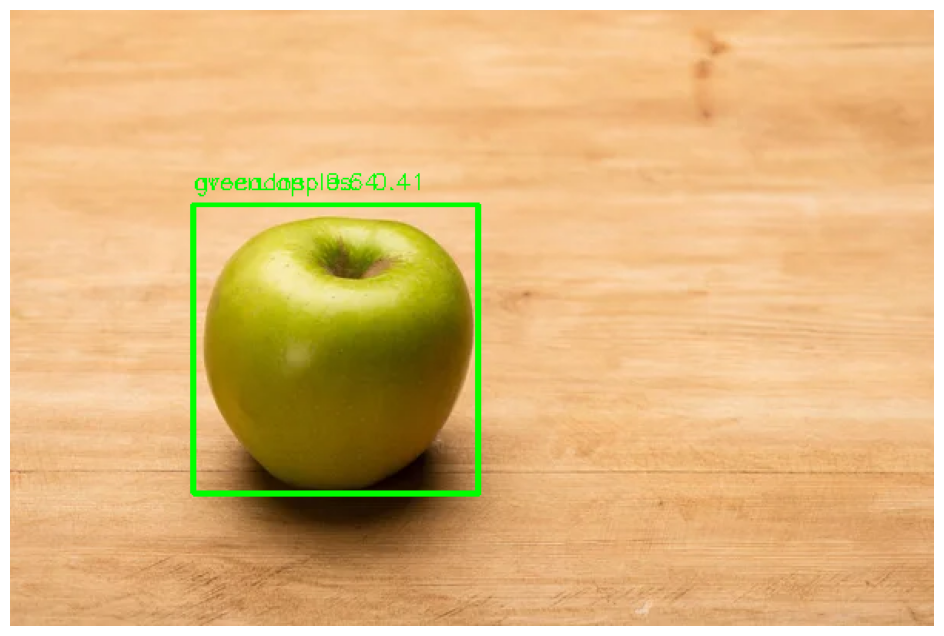


Detailed Detections:
Detection 1:
  Class: avocados
  Top Confidence: 0.64
  Bounding Box: (118.60324, 126.659996, 303.3555, 313.76074)
------------------------------
Detection 2:
  Class: green_apples
  Top Confidence: 0.41
  Bounding Box: (119.95533, 126.84353, 304.2738, 314.64713)
------------------------------


In [109]:
test_image(model, '/content/drive/MyDrive/green_calorie/test3.jpg', Config.CLASSES)


image 1/1 /content/drive/MyDrive/green_calorie/test4.jpg: 416x640 1 cucumber, 1 green_apples, 1 green_grapes, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


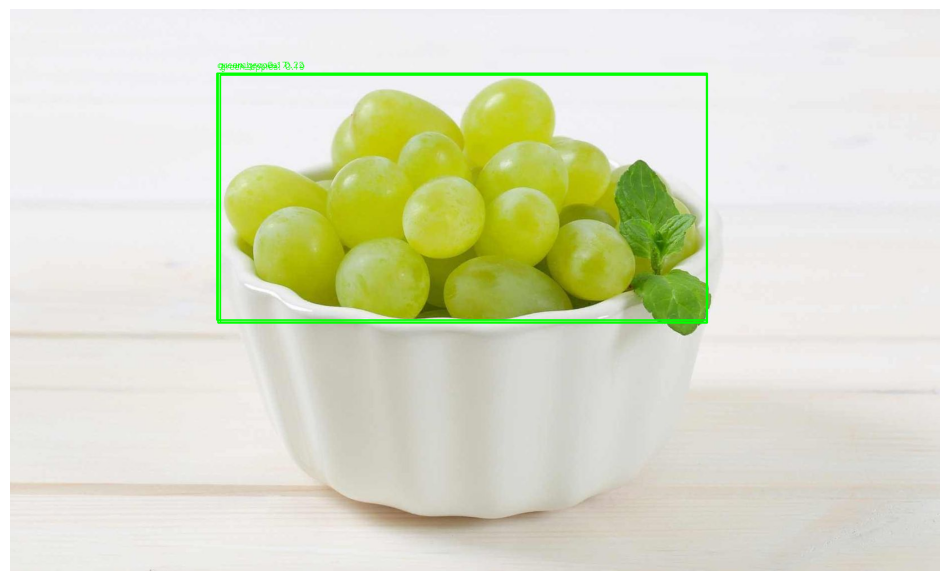


Detailed Detections:
Detection 1:
  Class: green_grapes
  Top Confidence: 0.22
  Bounding Box: (370.29095, 114.27511, 1241.7466, 558.87213)
------------------------------
Detection 2:
  Class: green_apples
  Top Confidence: 0.19
  Bounding Box: (374.53885, 117.41066, 1240.4456, 557.1429)
------------------------------
Detection 3:
  Class: cucumber
  Top Confidence: 0.17
  Bounding Box: (368.35455, 114.940994, 1241.019, 553.4828)
------------------------------


In [110]:
test_image(model, '/content/drive/MyDrive/green_calorie/test4.jpg', Config.CLASSES)


image 1/1 /content/drive/MyDrive/green_calorie/test6.jpg: 640x448 1 green_apples, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


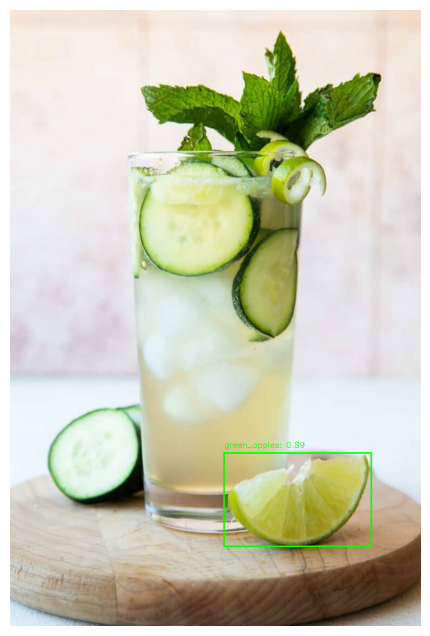


Detailed Detections:
Detection 1:
  Class: green_apples
  Top Confidence: 0.89
  Bounding Box: (398.89172, 825.80945, 672.82965, 999.7892)
------------------------------


In [115]:
test_image(model, '/content/drive/MyDrive/green_calorie/test6.jpg', Config.CLASSES)